## Importing Libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as c
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

## Reading dataset

In [2]:
data = pd.read_csv('h1b_kaggle.csv')
data.shape

(3002458, 11)

In [3]:
data

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [4]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
data.tail()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002457,3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [7]:
data.CASE_STATUS.value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

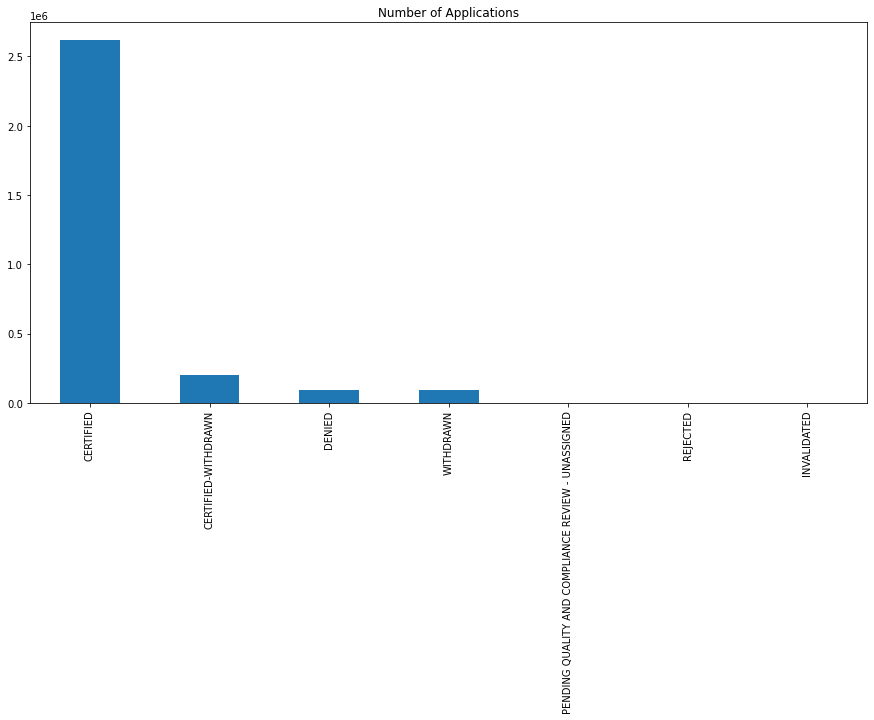

In [8]:
plt.figure(figsize=(15,7))
data.CASE_STATUS.value_counts().plot(kind='bar')
plt.title("Number of Applications")
plt.show()

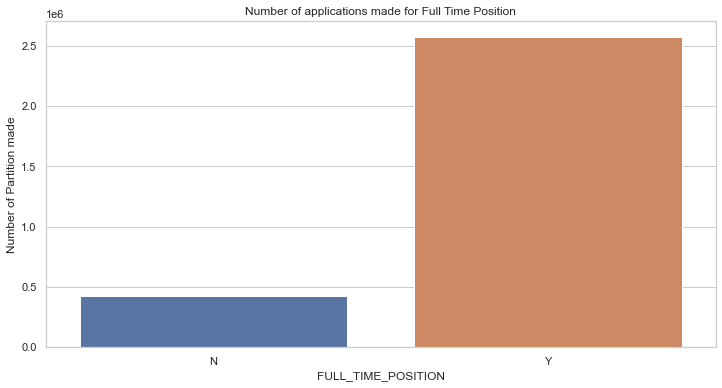

In [9]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.countplot(x='FULL_TIME_POSITION',data=data)
plt.title('Number of applications made for Full Time Position')
plt.ylabel('Number of Partition made')
plt.show()

In [10]:
top_emp = list(data['EMPLOYER_NAME'][data['YEAR'] >= 2015].groupby(data['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = data[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][data['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([data['EMPLOYER_NAME'], data['YEAR']])

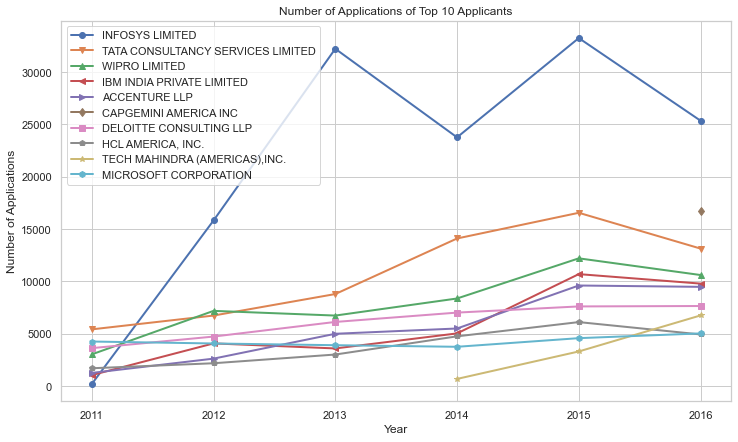

In [11]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d',
         's','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company,
             linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

In [12]:
data.WORKSITE.value_counts()

NEW YORK, NEW YORK            191719
HOUSTON, TEXAS                 83889
SAN FRANCISCO, CALIFORNIA      62787
ATLANTA, GEORGIA               52193
CHICAGO, ILLINOIS              51497
                               ...  
MARVEL, PENNSYLVANIA               1
BOSTON, FLORIDA                    1
5640 PIERSON HWY, MICHIGAN         1
JERICHO, MICHIGAN                  1
SAN RAMON, NORTH CAROLINA          1
Name: WORKSITE, Length: 18622, dtype: int64

## Removing Outliers

In [13]:
data=data[data['PREVAILING_WAGE']<=500000]
by_emp_year=data[['EMPLOYER_NAME',"YEAR",'PREVAILING_WAGE']][data['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year=by_emp_year.groupby([data['EMPLOYER_NAME'],data["YEAR"]])

## Checking for null values

In [14]:
data.isnull().any()

Unnamed: 0            False
CASE_STATUS           False
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                    True
lat                    True
dtype: bool

In [15]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [16]:
data['SOC_NAME']=data['SOC_NAME'].fillna(data['SOC_NAME'].mode()[0])
data['EMPLOYER_NAME']=data['EMPLOYER_NAME'].fillna(data['EMPLOYER_NAME'].mode()[0])
data['JOB_TITLE']=data['JOB_TITLE'].fillna(data['JOB_TITLE'].mode()[0])
data['lon']=data['lon'].fillna(data['lon'].mean())
data['lat']=data['lat'].fillna(data['lat'].mean())

<ipython-input-16-b166db2bbc79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME']=data['SOC_NAME'].fillna(data['SOC_NAME'].mode()[0])
<ipython-input-16-b166db2bbc79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EMPLOYER_NAME']=data['EMPLOYER_NAME'].fillna(data['EMPLOYER_NAME'].mode()[0])
<ipython-input-16-b166db2bbc79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [17]:
data.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [18]:
data.CASE_STATUS.value_counts()

CERTIFIED                                             2615530
CERTIFIED-WITHDRAWN                                    202650
DENIED                                                  92149
WITHDRAWN                                               89565
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

## Label Encoding

In [19]:
data['CASE_STATUS']=data['CASE_STATUS'].map({'CERTIFIED' : 0 , 'CERTIFIED-WITHDRAWN' : 1,'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4, 'REJECTED':5,'INVALIDATED' : 6})

<ipython-input-19-520edad83a7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CASE_STATUS']=data['CASE_STATUS'].map({'CERTIFIED' : 0 , 'CERTIFIED-WITHDRAWN' : 1,'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4, 'REJECTED':5,'INVALIDATED' : 6})


In [20]:
data['CASE_STATUS']

0          1
1          1
2          1
3          1
4          3
          ..
3002440    3
3002441    3
3002442    3
3002443    3
3002444    3
Name: CASE_STATUS, Length: 2999912, dtype: int64

In [21]:
data.CASE_STATUS.value_counts()

0    2615530
1     202650
2      92149
3      89565
4         15
5          2
6          1
Name: CASE_STATUS, dtype: int64

In [22]:
data.isnull().any()

Unnamed: 0            False
CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME              False
JOB_TITLE             False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                   False
lat                   False
dtype: bool

In [23]:
data['FULL_TIME_POSITION']=data['FULL_TIME_POSITION'].map({'N' : 0,'Y' : 1})

<ipython-input-23-398ef4195e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FULL_TIME_POSITION']=data['FULL_TIME_POSITION'].map({'N' : 0,'Y' : 1})


In [24]:
data['FULL_TIME_POSITION']

0          0
1          1
2          1
3          1
4          1
          ..
3002440    1
3002441    0
3002442    1
3002443    1
3002444    1
Name: FULL_TIME_POSITION, Length: 2999912, dtype: int64

In [25]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,1,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,1,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,1,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,3,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [26]:
data['SOC_NAME1']='others'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('computer','software')]='it'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('chief','mangement')]='manager'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('mechanical')]='mechanical'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('database')]='database'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('sales','market')]='scm'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('financial')]='finance'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('public','fundraising')]='pr'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('education','law')]='administrative'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('auditors','compliance')]='audit'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('distribution','logistics')]='scm'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('recruiters','human')]='hr'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('agricultural','farm')]='agri'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('construction','architectural')]='estate'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('forencsic','health')]='medical'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('teachers')]='education'

<ipython-input-26-5816780a6106>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1']='others'
<ipython-input-26-5816780a6106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1'][data['SOC_NAME'].str.contains('computer','software')]='it'
C:\Users\saich\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [27]:
data=data.drop(['Unnamed: 0','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','WORKSITE','lon','lat'],axis=1)

In [28]:
data

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_NAME1
0,1,0,36067.0,2016.0,others
1,1,1,242674.0,2016.0,others
2,1,1,193066.0,2016.0,others
3,1,1,220314.0,2016.0,others
4,3,1,157518.4,2016.0,others
...,...,...,...,...,...
3002440,3,1,64800.0,2011.0,others
3002441,3,0,70553.6,2011.0,others
3002442,3,1,33800.0,2011.0,others
3002443,3,1,59800.0,2011.0,others


In [29]:
data.isnull().any()

CASE_STATUS           False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
SOC_NAME1             False
dtype: bool

In [30]:
le=LabelEncoder()
data['SOC_N']=le.fit_transform(data['SOC_NAME1'])
data=data.drop(['SOC_NAME1'],axis=1)

In [31]:
data

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,1,0,36067.0,2016.0,2
1,1,1,242674.0,2016.0,2
2,1,1,193066.0,2016.0,2
3,1,1,220314.0,2016.0,2
4,3,1,157518.4,2016.0,2
...,...,...,...,...,...
3002440,3,1,64800.0,2011.0,2
3002441,3,0,70553.6,2011.0,2
3002442,3,1,33800.0,2011.0,2
3002443,3,1,59800.0,2011.0,2


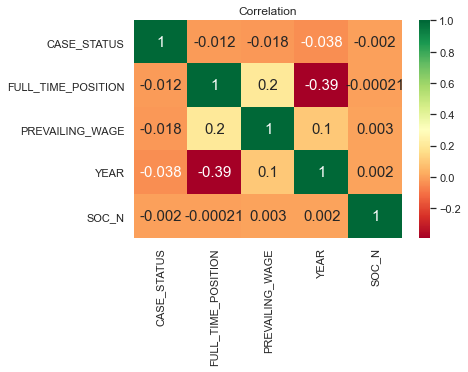

In [32]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',annot_kws={"size":15})
plt.title('Correlation')
plt.show()

## spliting Dependent and Independent Variables

In [33]:
x=data.iloc[:,1:5].values
y=data.iloc[:,0].values

In [34]:
x

array([[0.00000e+00, 3.60670e+04, 2.01600e+03, 2.00000e+00],
       [1.00000e+00, 2.42674e+05, 2.01600e+03, 2.00000e+00],
       [1.00000e+00, 1.93066e+05, 2.01600e+03, 2.00000e+00],
       ...,
       [1.00000e+00, 3.38000e+04, 2.01100e+03, 2.00000e+00],
       [1.00000e+00, 5.98000e+04, 2.01100e+03, 2.00000e+00],
       [1.00000e+00, 5.98000e+04, 2.01100e+03, 2.00000e+00]])

In [35]:
y

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

## Dividing the model into Train and Test data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=1)

In [37]:
x_train,x_test

(array([[0.00000e+00, 6.97630e+04, 2.01600e+03, 2.00000e+00],
        [0.00000e+00, 6.78080e+04, 2.01600e+03, 2.00000e+00],
        [1.00000e+00, 1.18186e+05, 2.01300e+03, 2.00000e+00],
        ...,
        [1.00000e+00, 5.01280e+04, 2.01200e+03, 2.00000e+00],
        [1.00000e+00, 7.57330e+04, 2.01600e+03, 2.00000e+00],
        [0.00000e+00, 5.79070e+04, 2.01600e+03, 2.00000e+00]]),
 array([[1.00000e+00, 7.77090e+04, 2.01400e+03, 2.00000e+00],
        [1.00000e+00, 6.35860e+04, 2.01300e+03, 2.00000e+00],
        [0.00000e+00, 4.77780e+04, 2.01600e+03, 2.00000e+00],
        ...,
        [1.00000e+00, 7.39230e+04, 2.01500e+03, 2.00000e+00],
        [0.00000e+00, 5.95500e+04, 2.01600e+03, 2.00000e+00],
        [1.00000e+00, 1.32829e+05, 2.01300e+03, 2.00000e+00]]))

In [38]:
y_train,y_test

(array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

## Logistic Regression

In [39]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\saich\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred_lr=lr.predict(x_test)

In [41]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
c(y_pred_lr)

Counter({0: 749978})

In [43]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
print(accuracy_score(y_test,y_pred_lr))

0.8720709140801464


In [45]:
print(confusion_matrix(y_test,y_pred_lr))

[[654034      0      0      0      0]
 [ 50817      0      0      0      0]
 [ 22840      0      0      0      0]
 [ 22285      0      0      0      0]
 [     2      0      0      0      0]]


In [46]:
print(classification_report(y_test,y_pred_lr))

C:\Users\saich\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93    654034
           1       0.00      0.00      0.00     50817
           2       0.00      0.00      0.00     22840
           3       0.00      0.00      0.00     22285
           4       0.00      0.00      0.00         2

    accuracy                           0.87    749978
   macro avg       0.17      0.20      0.19    749978
weighted avg       0.76      0.87      0.81    749978



## RandomForest

In [47]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_rf=rf.predict(x_test)

In [49]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
c(y_pred_rf)

Counter({0: 734817, 1: 9929, 2: 3853, 3: 1379})

In [51]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
print(accuracy_score(y_test,y_pred_rf))

0.8696068418006928


In [53]:
print(confusion_matrix(y_test,y_pred_rf))

[[646160   4287   2651    936      0]
 [ 45603   4900    171    143      0]
 [ 21570    244    926    100      0]
 [ 21482    498    105    200      0]
 [     2      0      0      0      0]]


In [54]:
print(classification_report(y_test,y_pred_rf))

C:\Users\saich\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    654034
           1       0.49      0.10      0.16     50817
           2       0.24      0.04      0.07     22840
           3       0.15      0.01      0.02     22285
           4       0.00      0.00      0.00         2

    accuracy                           0.87    749978
   macro avg       0.35      0.23      0.24    749978
weighted avg       0.81      0.87      0.83    749978



## Decision Tree

In [55]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred_dt=dt.predict(x_test)

In [57]:
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
c(y_pred_dt)

Counter({0: 736389, 1: 9239, 2: 3301, 3: 1049})

In [59]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
print(accuracy_score(y_test,y_pred_dt))

0.8704855342423378


In [61]:
print(confusion_matrix(y_test,y_pred_dt))

[[647180   3863   2273    718      0]
 [ 45900   4697    122     98      0]
 [ 21747    214    807     72      0]
 [ 21560    465     99    161      0]
 [     2      0      0      0      0]]


In [62]:
print(classification_report(y_test,y_pred_dt))

C:\Users\saich\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    654034
           1       0.51      0.09      0.16     50817
           2       0.24      0.04      0.06     22840
           3       0.15      0.01      0.01     22285
           4       0.00      0.00      0.00         2

    accuracy                           0.87    749978
   macro avg       0.36      0.22      0.23    749978
weighted avg       0.81      0.87      0.82    749978



In [63]:
pickle.dump(dt,open('visarf.pkl','wb'))

## K N N

In [64]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [65]:
y_pred_knn=knn.predict(x_test)

In [66]:
c(y_pred_knn)

Counter({0: 736052, 1: 9700, 2: 2842, 3: 1384})

In [67]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
print(accuracy_score(y_test,y_pred_knn))

0.8682641357479819


In [69]:
print(confusion_matrix(y_test,y_pred_knn))

[[646267   4839   1950    978      0]
 [ 46383   4097    149    188      0]
 [ 21891    260    643     46      0]
 [ 21509    504    100    172      0]
 [     2      0      0      0      0]]


In [70]:
print(classification_report(y_test,y_pred_knn))

C:\Users\saich\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    654034
           1       0.42      0.08      0.14     50817
           2       0.23      0.03      0.05     22840
           3       0.12      0.01      0.01     22285
           4       0.00      0.00      0.00         2

    accuracy                           0.87    749978
   macro avg       0.33      0.22      0.23    749978
weighted avg       0.80      0.87      0.82    749978



## SVM